In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = df = pd.read_csv('Cleaned_tweets.csv')
df.head()

,Unnamed: 0,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text
0,1515,ass,gametheoryosmer,1.330000e+18,11-11-2020 06:55,0,NaN,NaN,1,"my lieutenant called me a ""Pussy"" for not wipi..."
1,1167,bastard,oyibutter,1.330000e+18,11-11-2020 07:25,0,NaN,NaN,0,My fwb showed me pepper. I caught bastard feel...
2,115,Bad Fuck,Bigafterglow,1.330000e+18,11-11-2020 07:09,0,NaN,NaN,0,Oh fuck! What a bad tweet.
3,1740,bitch,ItsBillcosby,1.330000e+18,11-11-2020 07:27,0,NaN,NaN,1,If the dick fit suck it bitch 〽️™️
4,983,ass,SlayerOfWaifu,1.330000e+18,11-11-2020 06:55,1,NaN,NaN,0,If you think Fairy Tail is ass you do you 🤷🏽‍♂...


In [ ]:
del df['Username']
del df['Key Word']
del df['User_ID']
del df['Datetime']
del df['Favorite_count']
del df['Geo']
del df['Coordinates']
df.columns = ['Unnamed','Label', 'Text']
del df['Unnamed']
df.head()

,Label,Text
0,1,"my lieutenant called me a ""Pussy"" for not wipi..."
1,0,My fwb showed me pepper. I caught bastard feel...
2,0,Oh fuck! What a bad tweet.
3,1,If the dick fit suck it bitch 〽️™️
4,0,If you think Fairy Tail is ass you do you 🤷🏽‍♂...


In [ ]:
X = df.Text
Y = df.Label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
14/14 [==============================] - 3s 188ms/step - loss: 0.2811 - accuracy: 0.8896 - val_loss: 0.7401 - val_accuracy: 0.6667
Epoch 2/10
14/14 [==============================] - 3s 188ms/step - loss: 0.2771 - accuracy: 0.8880 - val_loss: 0.7317 - val_accuracy: 0.6892
Epoch 3/10
14/14 [==============================] - 3s 185ms/step - loss: 0.2571 - accuracy: 0.8992 - val_loss: 0.7583 - val_accuracy: 0.6824


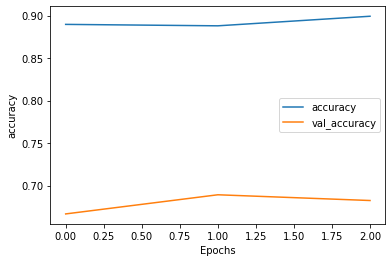

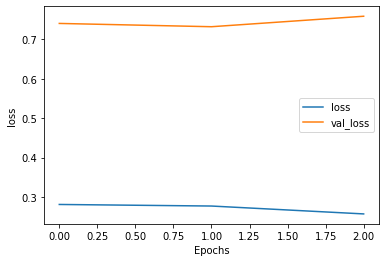

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.7407 - accuracy: 0.7245


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.741
  Accuracy: 0.724
